In [229]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [179]:
## Unpickle the data
## This is cleaned data with all features, including dummies for categorical variables.
df = pd.read_pickle('intial_data_all_features')
df.head()

,name,domestic_gross,international_gross,opening_dollars,running_time_mins,days_in_release,widest_release_in_theatres,franchise,title_length,Drama,...,Sport,Western,Not Rated,PG,PG-13,R,Unrated,Spring,Summer,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,260138569.0,148,54,4336,1,23,0,...,0,0,0,0,1,0,0,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,75388688.0,132,159,4300,1,41,0,...,0,0,0,0,1,0,0,0,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,90033210.0,97,131,4225,0,27,0,...,0,0,0,0,1,0,0,0,0,0
3,Black Widow,183651655.0,1.959797e+08,80366312.0,134,215,4275,1,11,0,...,0,0,0,0,1,0,0,0,1,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,70043165.0,143,229,4203,1,17,0,...,0,0,0,0,1,0,0,0,1,0


In [180]:
df.drop_duplicates(inplace=True)
df.shape

(1071, 38)

In [181]:
## drop opening dollars
## Dropping year columns is throwing errors? It doesn't seem to recognize
## the column names as strings. Going to backtrack and drop them in a different
## notebook, then re-pickle.
df = df.drop(columns = ['opening_dollars'])
df.head()

,name,domestic_gross,international_gross,running_time_mins,days_in_release,widest_release_in_theatres,franchise,title_length,Drama,Comedy,...,Sport,Western,Not Rated,PG,PG-13,R,Unrated,Spring,Summer,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,148,54,4336,1,23,0,0,...,0,0,0,0,1,0,0,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,132,159,4300,1,41,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,97,131,4225,0,27,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Black Widow,183651655.0,1.959797e+08,134,215,4275,1,11,0,0,...,0,0,0,0,1,0,0,0,1,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,143,229,4203,1,17,0,0,...,0,0,0,0,1,0,0,0,1,0


In [182]:
## drop audience ratings
df = df.drop(columns = ['Not Rated', 'PG', 'PG-13', 'R', 'Unrated'])
df.head()

,name,domestic_gross,international_gross,running_time_mins,days_in_release,widest_release_in_theatres,franchise,title_length,Drama,Comedy,...,History,Music,Documentary,Musical,War,Sport,Western,Spring,Summer,Winter
0,Spider-Man: No Way Home,750429025.0,1.027000e+09,148,54,4336,1,23,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Shang-Chi and the Legend of the Ten Rings,224543292.0,2.076897e+08,132,159,4300,1,41,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Venom: Let There Be Carnage,213550366.0,2.885000e+08,97,131,4225,0,27,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Black Widow,183651655.0,1.959797e+08,134,215,4275,1,11,0,0,...,0,0,0,0,0,0,0,0,1,0
4,F9: The Fast Saga,173005945.0,5.532236e+08,143,229,4203,1,17,0,0,...,0,0,0,0,0,0,0,0,1,0


In [183]:
## drop franchise feature
##df = df.drop(columns = ['franchise'])
#df.head()

In [184]:
df.shape

(1071, 32)

In [185]:
## Separate target and other features
X = df.drop(columns = ['international_gross', 'name'])
y = df['international_gross']
y.head()

0    1.027000e+09
1    2.076897e+08
2    2.885000e+08
3    1.959797e+08
4    5.532236e+08
Name: international_gross, dtype: float64

In [186]:
## Split into train/validate/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [187]:
X_train.shape, y_train.shape

((856, 30), (856,))

In [215]:
model = LinearRegression()
reg_mod = model.fit(X_train, y_train)

In [189]:
predictions = model.predict(X_train)
mean_absolute_error(y_train, predictions)

47857141.44655296

In [216]:
model.score(X_train, y_train)

0.7483541543098966

In [217]:
model.intercept_

-118514723.23015344

In [218]:
model.coef_

array([ 1.37808478e+00,  9.61613477e+05,  6.56682412e+04, -6.19418116e+03,
        1.84705658e+07,  4.89532276e+05, -5.94194887e+06, -1.72224302e+07,
        2.35482588e+07,  1.84762345e+07,  3.74612354e+07,  5.63716607e+05,
       -2.31847405e+07, -1.13685539e+07,  3.39034093e+06,  1.07464251e+07,
       -9.82128047e+06, -1.37388448e+07,  5.33219858e+06,  2.89095826e+07,
       -1.83664415e+06,  1.37666024e+07, -7.83470958e+06,  4.68612027e+06,
        2.51289837e+07,  2.44176032e+06, -3.62580260e+07,  6.08513063e+06,
        6.59751348e+06, -1.87843068e+07])

In [193]:
lm = LinearRegression()
kf = KFold(n_splits = 5, shuffle = True, random_state = 6)
lm_cv = cross_val_score(lm, X_train, y_train, cv = kf, scoring = 'r2')
print(lm_cv)

[0.83138999 0.66035289 0.65880805 0.5809125  0.72545834]


In [194]:
## A lot of variation in these scores still looks like overfitting!

In [195]:
lm_cv_mae = cross_val_score(lm, X_train, y_train, cv = kf, scoring = 'neg_mean_absolute_error')
print(lm_cv_mae)

[-53399517.47986008 -42577520.68193438 -53595139.76168375
 -49846445.45311624 -53569310.51069766]


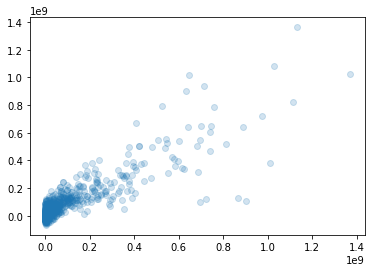

In [221]:
# Fitted vs. Actual
y_train_pred = model.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
#plt.plot()

Text(0.5, 1.0, 'Residuals vs. Predictions')

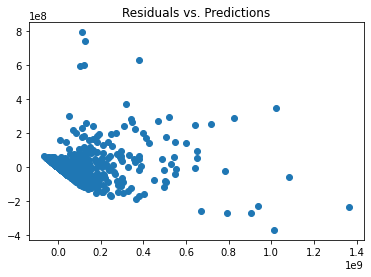

In [222]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
plt.title("Residuals vs. Predictions")

## VIF

In [196]:
## Check VIF becasue I know from MVP that there may be some multicollinearity issues.
## Code adapted from Collinearity slides

VIF_x = X_train
VIF_x = sm.add_constant(X_train)
VIF_y = y_train
sm_model = sm.OLS(VIF_y, VIF_x)
results = sm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     international_gross   R-squared:                       0.748
Model:                             OLS   Adj. R-squared:                  0.739
Method:                  Least Squares   F-statistic:                     81.78
Date:                 Mon, 21 Feb 2022   Prob (F-statistic):          7.13e-224
Time:                         19:02:10   Log-Likelihood:                -16850.
No. Observations:                  856   AIC:                         3.376e+04
Df Residuals:                      825   BIC:                         3.391e+04
Df Model:                           30                                         
Covariance Type:             nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -1.185e+08    2.6e+07     -4.567      0.000   -1.69e+08   -6.76e+07
domestic_gross                 1.3781      0.044     31.379      0.000       1.292       1.464
running_time_mins           9.616e+05    1.9e+05      5.057      0.000    5.88e+05    1.33e+06
days_in_release             6.567e+04   2.61e+04      2.518      0.012    1.45e+04    1.17e+05
widest_release_in_theatres -6194.1812   2965.358     -2.089      0.037    -1.2e+04    -373.646
franchise                   1.847e+07   9.34e+06      1.978      0.048    1.41e+05    3.68e+07
title_length                4.895e+05   3.49e+05      1.401      0.161   -1.96e+05    1.18e+06
Drama                      -5.942e+06   8.12e+06     -0.732      0.464   -2.19e+07    9.99e+06
Comedy                     -1.722e+07   7.91e+06     -2.178      0.030   -3.27e+07    -1.7e+06
Action                      2.355e+07   9.03e+06      2.609      0.009    5.83e+06    4.13e+07
Thriller                    1.848e+07   8.97e+06      2.060      0.040    8.69e+05    3.61e+07
Adventure                   3.746e+07   1.02e+07      3.685      0.000    1.75e+07    5.74e+07
Fantasy                     5.637e+05   9.82e+06      0.057      0.954   -1.87e+07    1.98e+07
Sci-Fi                     -2.318e+07    9.5e+06     -2.442      0.015   -4.18e+07   -4.55e+06
Crime                      -1.137e+07   9.81e+06     -1.159      0.247   -3.06e+07    7.89e+06
Family                       3.39e+06   1.44e+07      0.235      0.814   -2.49e+07    3.17e+07
Romance                     1.075e+07   9.64e+06      1.114      0.266   -8.18e+06    2.97e+07
Biography                  -9.821e+06   1.06e+07     -0.926      0.355   -3.06e+07     1.1e+07
Horror                     -1.374e+07   1.19e+07     -1.156      0.248   -3.71e+07     9.6e+06
Mystery                     5.332e+06   1.09e+07      0.488      0.626   -1.61e+07    2.68e+07
Animation                   2.891e+07   1.48e+07      1.956      0.051   -1.04e+05    5.79e+07
History                    -1.837e+06   1.42e+07     -0.130      0.897   -2.96e+07     2.6e+07
Music                       1.377e+07   1.57e+07      0.877      0.380    -1.7e+07    4.46e+07
Documentary                -7.835e+06   1.74e+07     -0.451      0.652   -4.19e+07    2.62e+07
Musical                     4.686e+06   1.67e+07      0.280      0.780   -2.82e+07    3.75e+07
War                         2.513e+07   1.64e+07      1.529      0.127   -7.14e+06    5.74e+07
Sport                       2.442e+06   1.62e+07      0.151      0.880   -2.93e+07    3.42e+07
Western                    -3.626e+07   2.71e+07     -1.336      0.182   -8.95e+07     1.7e+07
Spring                      6.085e+06   8.81e+06      0.690      0.490   -1.12e+07    2.34e+07
Summer                      6.59

In [197]:
variables = results.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

[75.68465640936593,
 1.965543690174239,
 1.5042330380937297,
 1.338333764700471,
 1.9412007169611942,
 1.6793385134674543,
 1.1453190478334812,
 1.8474742511269375,
 1.59404264678961,
 1.9521758440349462,
 1.903813302200754,
 2.4062277369584555,
 1.6240223800481133,
 1.433278140242578,
 1.3668698401688428,
 2.763483299162908,
 1.294765251220961,
 1.4152073727106198,
 1.820119405299194,
 1.5040618516411433,
 2.2644754664704516,
 1.2620374796759286,
 1.1142048366037656,
 1.5093181658150552,
 1.201017909214181,
 1.125390161688202,
 1.12283656700663,
 1.0495047204607963,
 1.4905409559670009,
 1.5729044437380661,
 1.6125181852106962]

In [198]:
## Round 1: drop opening weekend dollars and release year categorical variables due to high VIF
## Round 2: drop ratings due to high VIF
## Round 3: really high VIF numbers for certain distributors -- Disney, Warner Bros, Universal, 
## 20th Century Fox. I suspect there is a high correlation with Franchise feature, will drop 
## Franchise feature to see what effect is.
## Round 4: dropping 'franchise' did not resolve high VIF for certain distributors.
## Will instead drop distributors and see what effect is.
## Round 5: Kept distributors dropped but added ratings back in. Ratings still have very
## high VIF numbers so will remove them again.
## Result -- No VIF scores above 5! Dropping these features def improved some
## of the variation in results for eachc K fold, but there is still a LOT of variation.


In [208]:
fit = sm_model.fit()
#print(fit.summary())

In [201]:
#fig = plt.scatter(sm_model.predict(), sm_model.resid())
#fig.axes.set_ylabel('Residual')
#fig.axes.set_xlabel('Prediction')

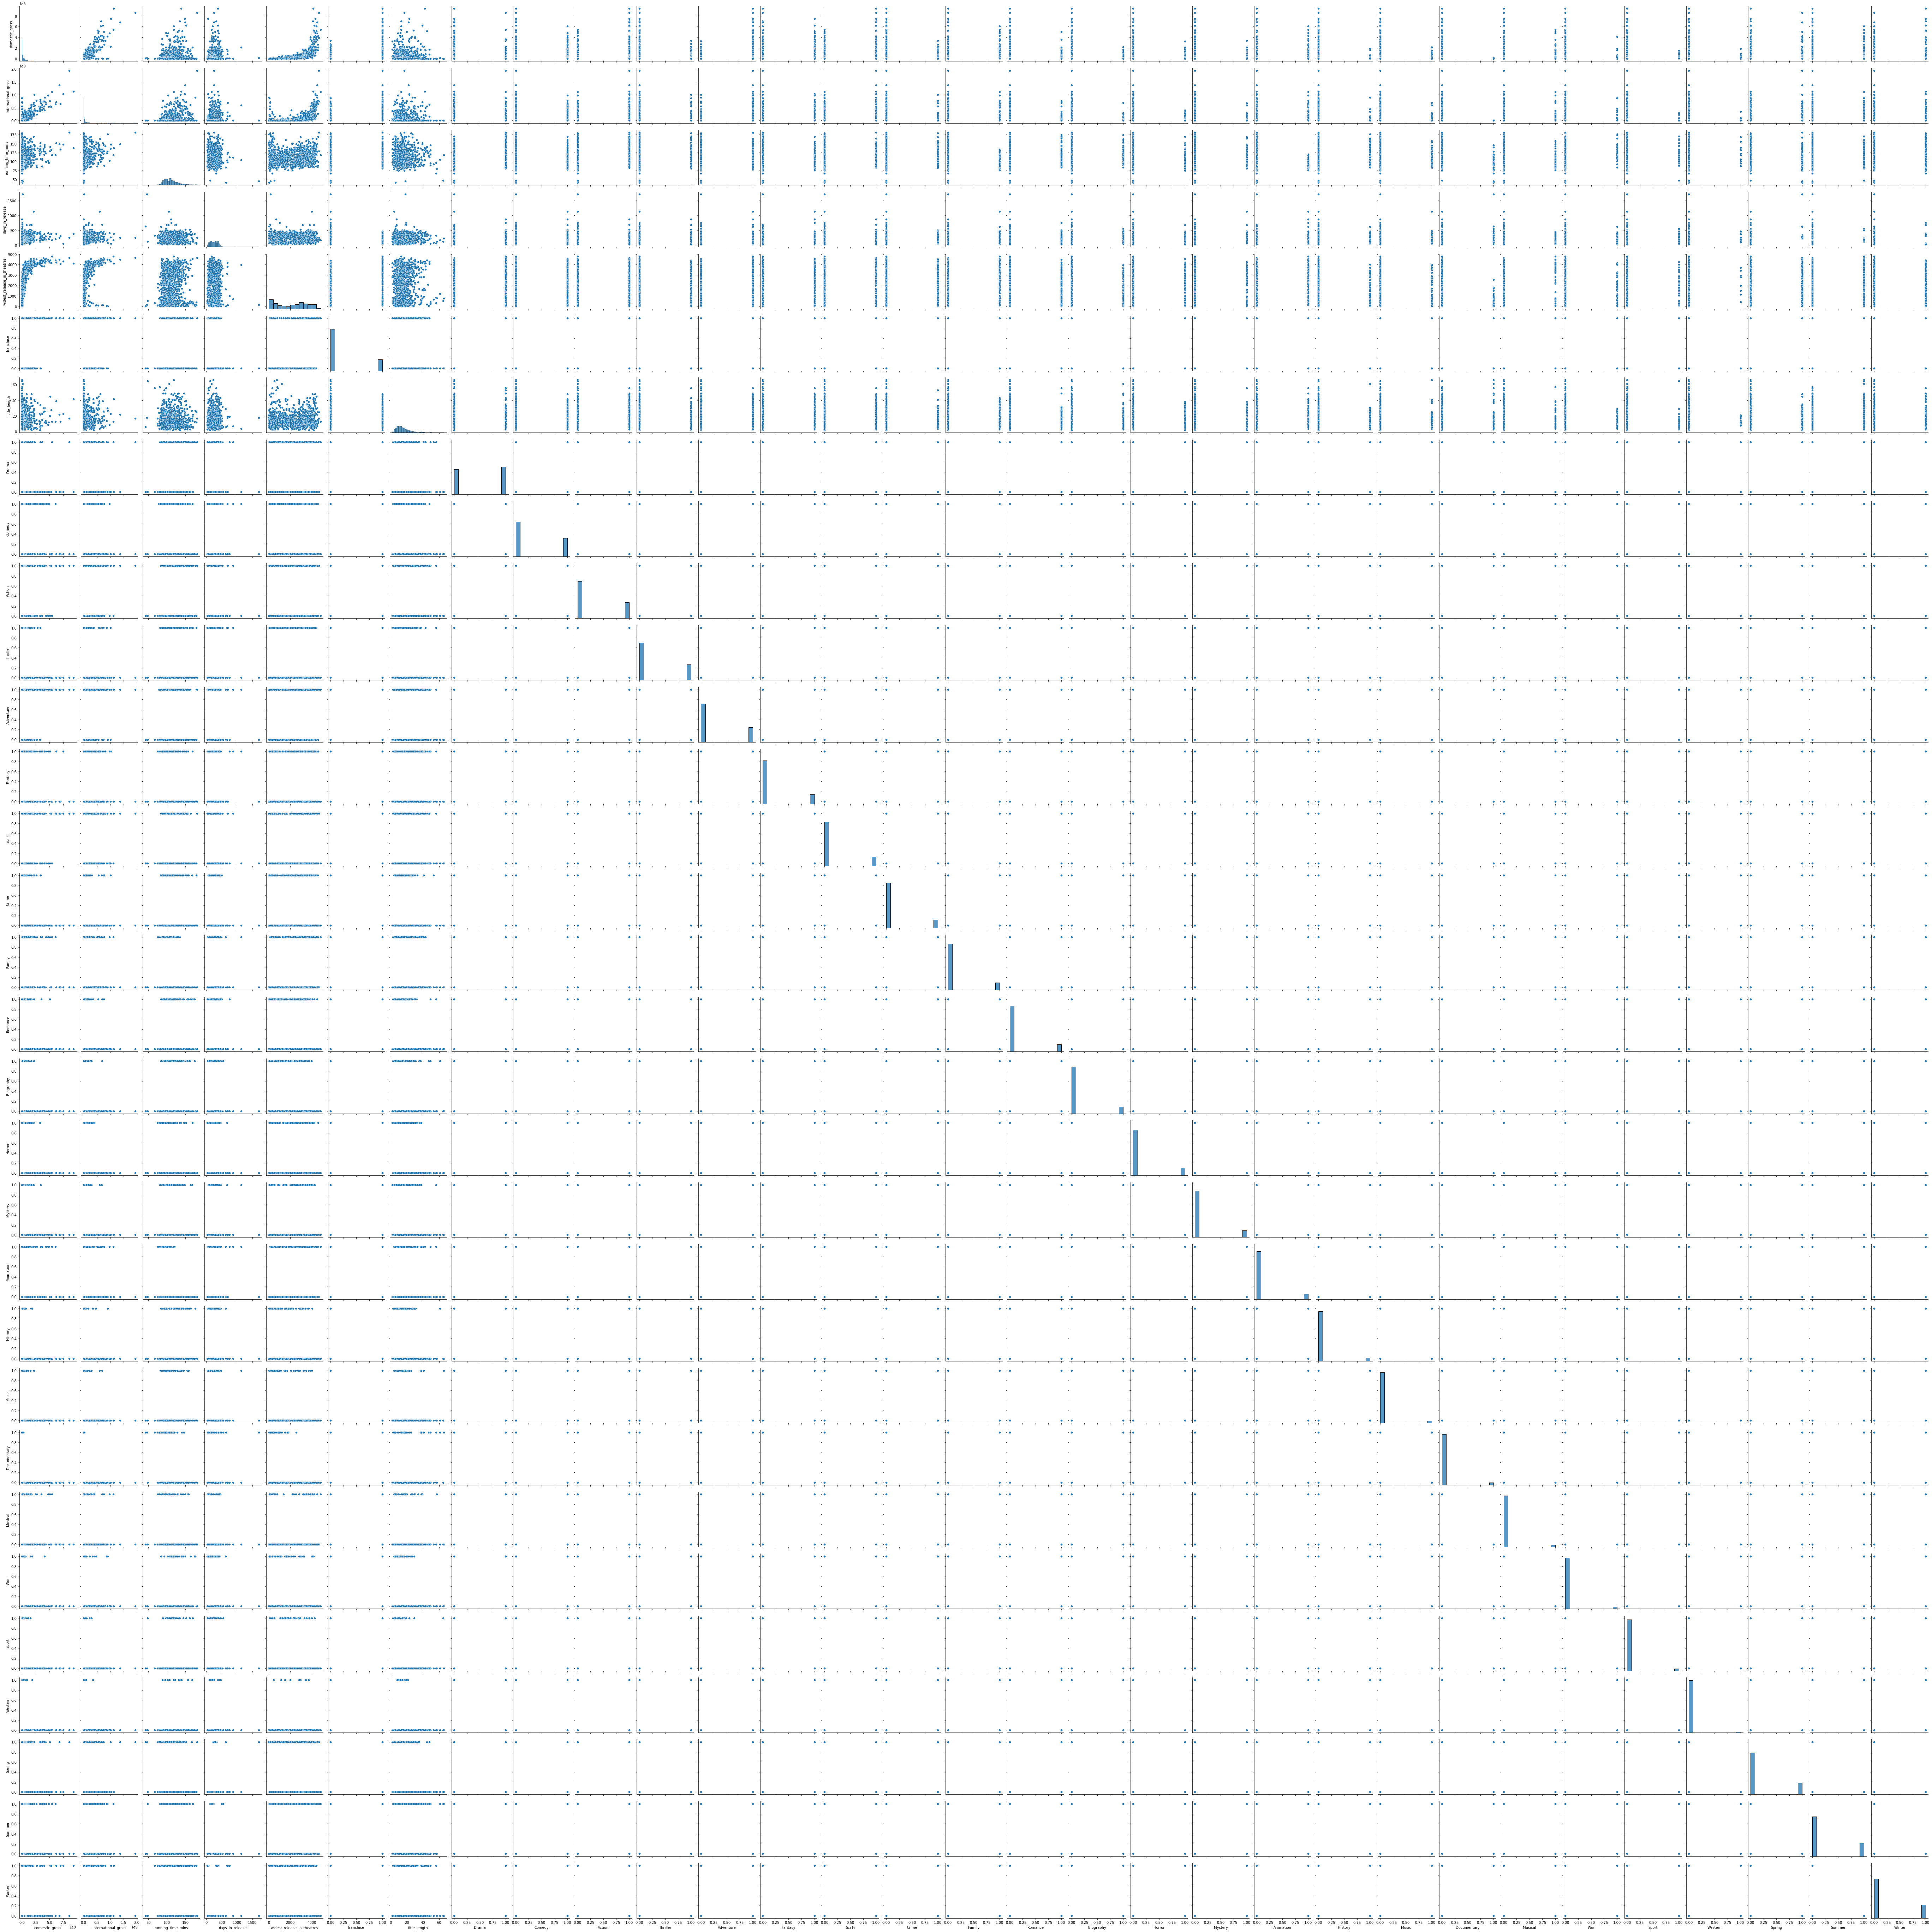

In [202]:
## Indexing issue. Going to go back and undo reindex to movie name.
import seaborn as sns
sns.pairplot(df)

In [233]:
## Let's try Lasso since we still have a lot of features and it will eliminate some
## Code adapted from Lasso slides and Lasso exercise answers


std = StandardScaler()
std.fit(X_train.values)
## apply the scaler to the train set
X_tr = std.transform(X_train.values)
## Apply the scaler to the test set
X_te = std.transform(X_test.values)
lasso = Lasso(alpha = 10000)
lasso.fit(X_tr, y_train)
test_r_squared = lasso.score(X_te, y_test)
print(test_r_squared)
print(list(zip(X_train.columns, lasso.coef_)))
print(len(list(zip(X_train.columns, lasso.coef_))))



0.7346393565835633
[('domestic_gross', 131222308.72723977), ('running_time_mins', 18489614.60932939), ('days_in_release', 8666268.54487093), ('widest_release_in_theatres', -8643613.837778034), ('franchise', 7636812.128349484), ('title_length', 4464181.276708613), ('Drama', -2948733.2211193494), ('Comedy', -8187420.975446715), ('Action', 10864102.472558836), ('Thriller', 8458079.593937166), ('Adventure', 17057503.528608114), ('Fantasy', 213818.9381581061), ('Sci-Fi', -8695609.286749627), ('Crime', -4023747.821845719), ('Family', 1155179.1838503596), ('Romance', 3769187.6423152443), ('Biography', -3277379.8378466684), ('Horror', -4624684.278318673), ('Mystery', 1761468.103549077), ('Animation', 8770182.387790877), ('History', -425365.1567124378), ('Music', 2750737.433960422), ('Documentary', -1629977.1744652956), ('Musical', 909118.14533571), ('War', 4826405.591540193), ('Sport', 458775.65780985), ('Western', -4073918.7174058408), ('Spring', 2501322.478811534), ('Summer', 2868621.9642793

In [234]:
### BEGIN SOLUTION
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
alphas = 10**np.linspace(-2,2,200)
lasso_model = LassoCV(alphas = alphas, cv=5)
lasso_model.fit(X_tr, y_train)
r_squared_train = lasso_model.score(X_tr, y_train)
#r_squared_test = lasso_model.score(X_te, y_test)
alpha = lasso_model.alpha_

print(r_squared_train)
# print(r_squared_test)
print(alpha)


0.7483541542945551
100.0


Computing regularization path using the LARS ...


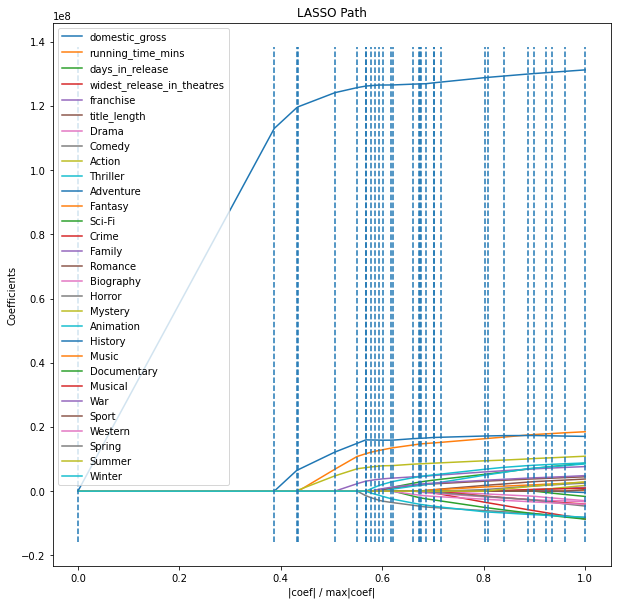

In [235]:
from sklearn.linear_model import lars_path
import matplotlib.pyplot as plt

alphas = 10**np.linspace(-2,2,200)

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')

# plotting the LARS path

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

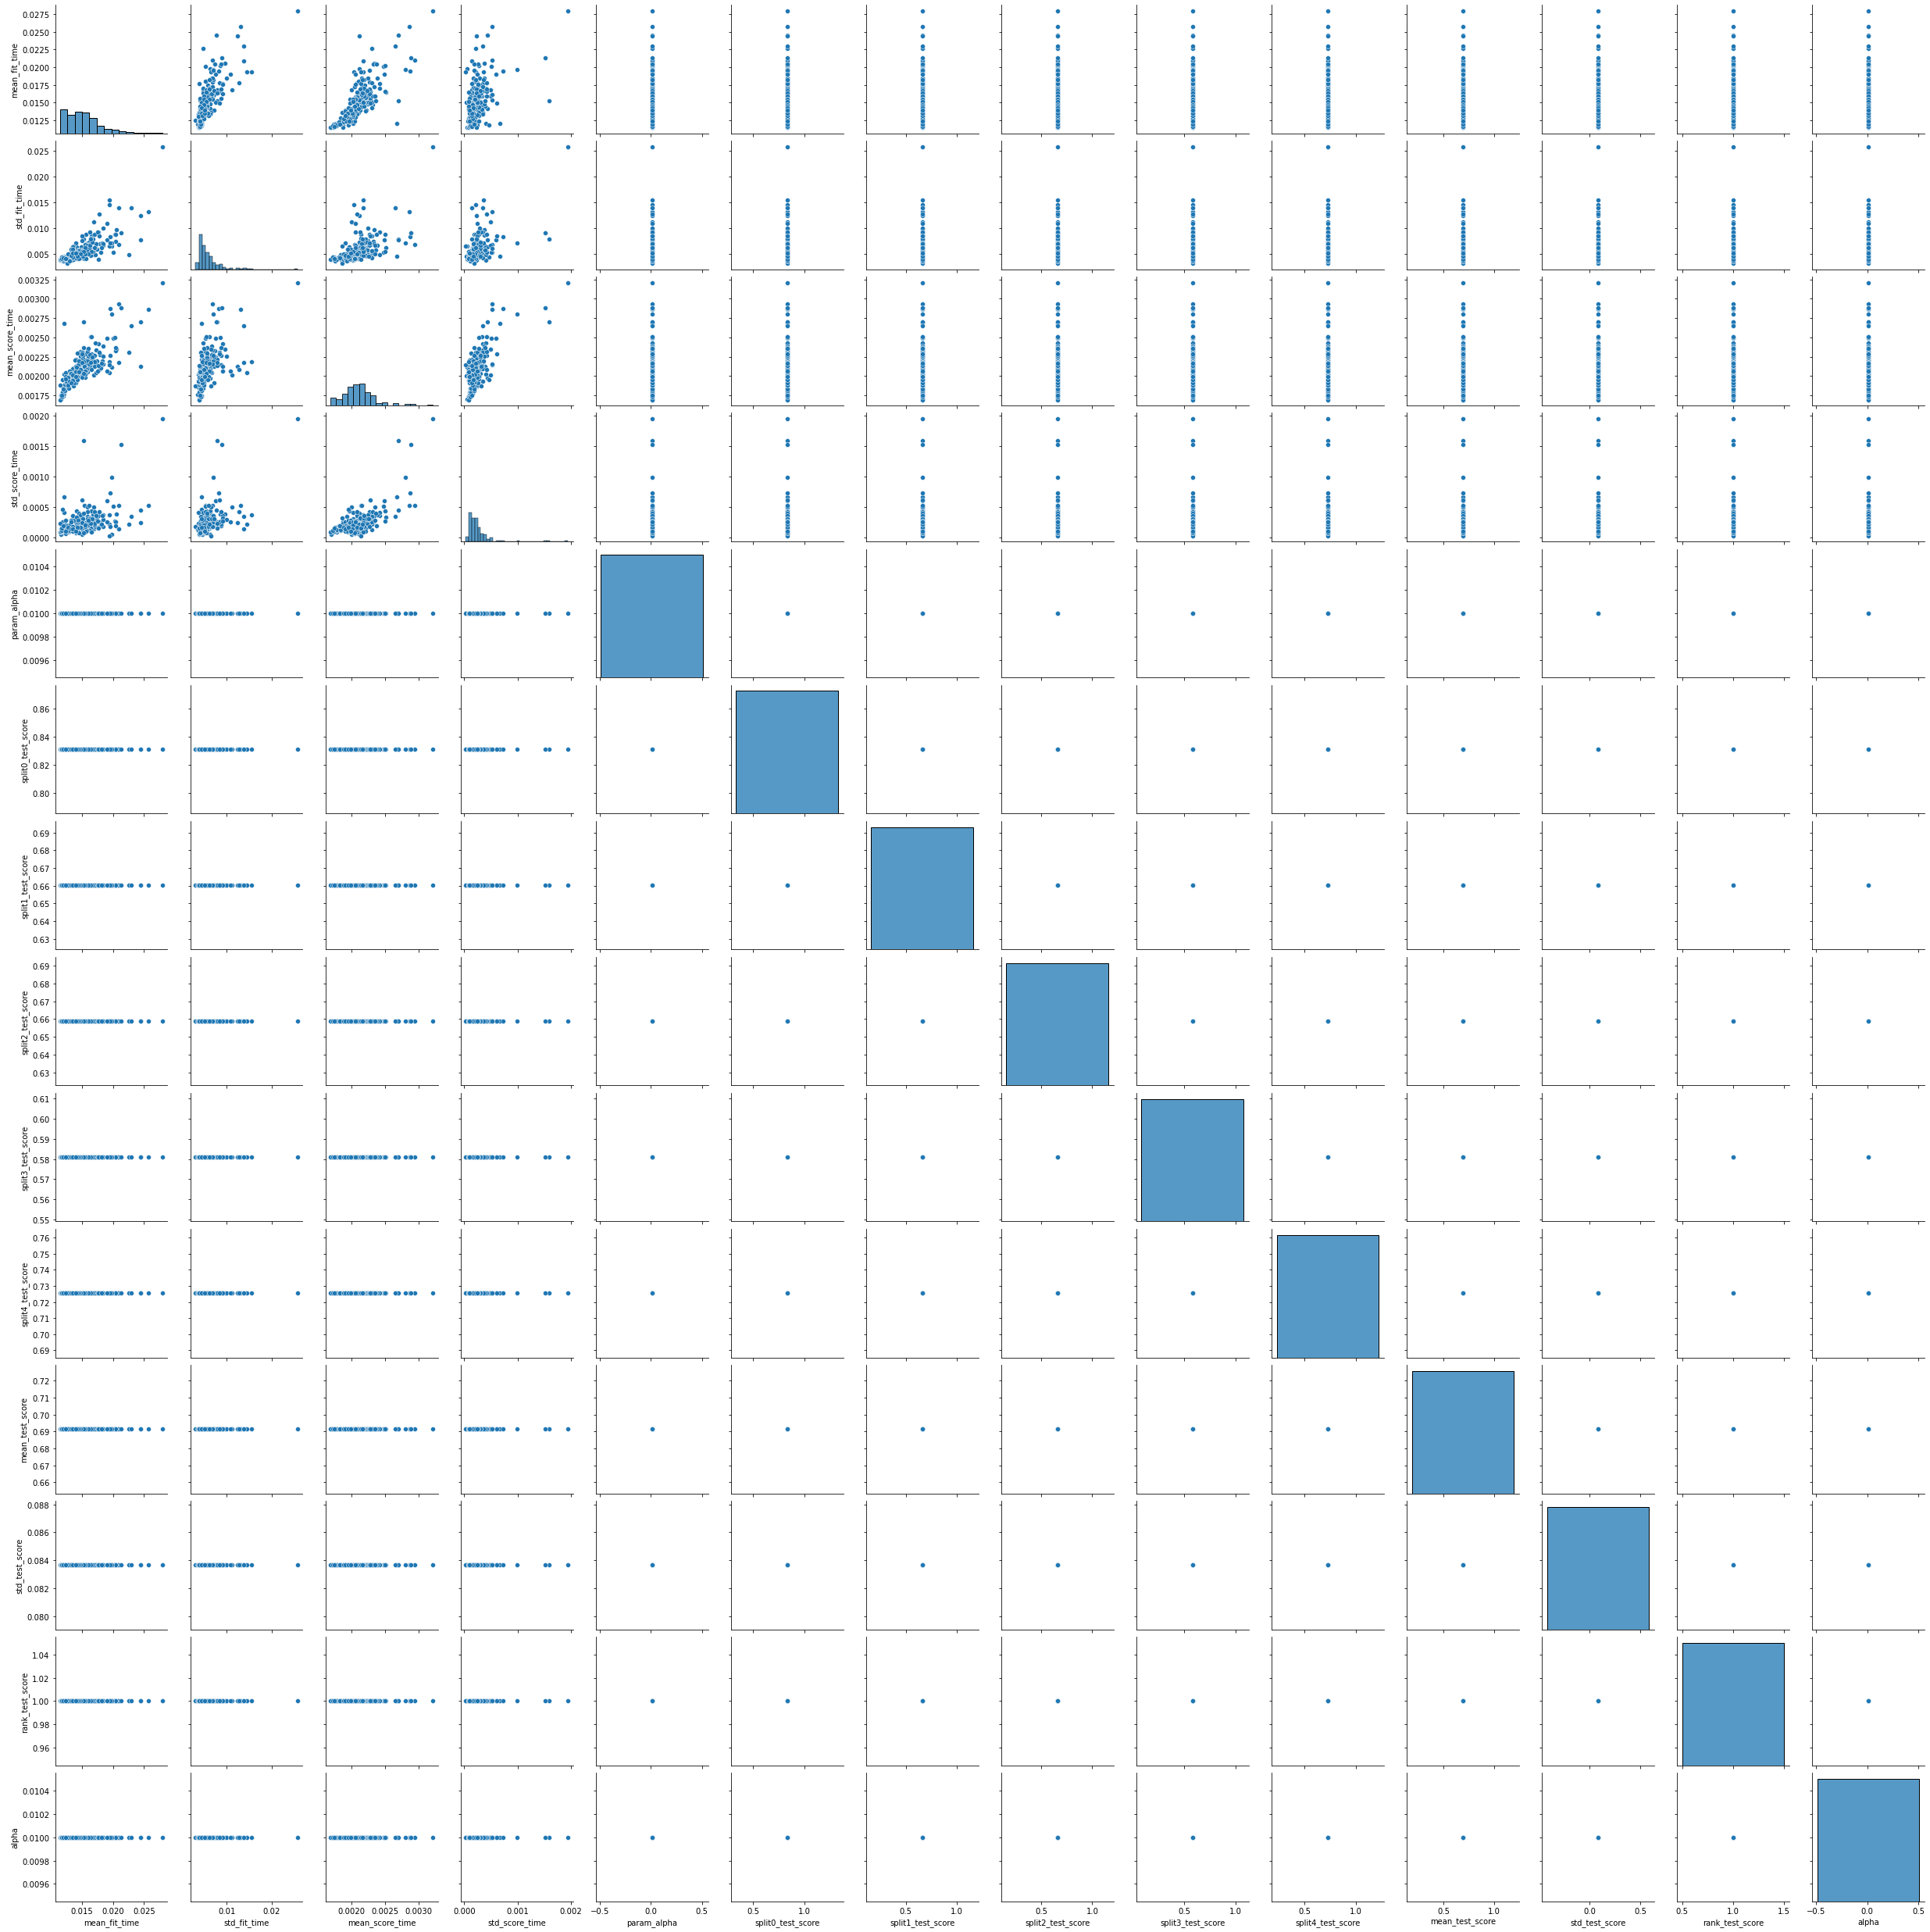

In [236]:
import seaborn as sns
sns.pairplot(df)